In [2]:
import numpy as np  #linear algebra
import pandas as pd  #data processing, csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output 


In [3]:
df = pd.read_csv('./input/cs448b_ipasn.csv')

In [4]:
df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [3]:
#날짜별로 그룹 만들기
df['date'] = pd.to_datetime(df['date'])
df=df.groupby(['date','l_ipn'],as_index=False).sum()  #as_index: 이 그룹을 인덱스로 지정할 것인지 여부
#data와 l_ipn별로 변수들의 합을 구함

In [4]:
df['yday'] = df['date'].dt.dayofyear
df['wday']=df['date'].dt.dayofweek

In [5]:
ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4]
max4 = np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6]
max6 = np.max(ip6['f'])
ip7 = df[df['l_ipn']==7]
max7 = np.max(ip7['f'])
ip8 = df[df['l_ipn']==8]
max8 = np.max(ip8['f'])
ip9 = df[df['l_ipn']==9]
max9 = np.max(ip9['f'])
ip0.head(2)

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6


Text(0.5,1,'Local IP 9 Flow')

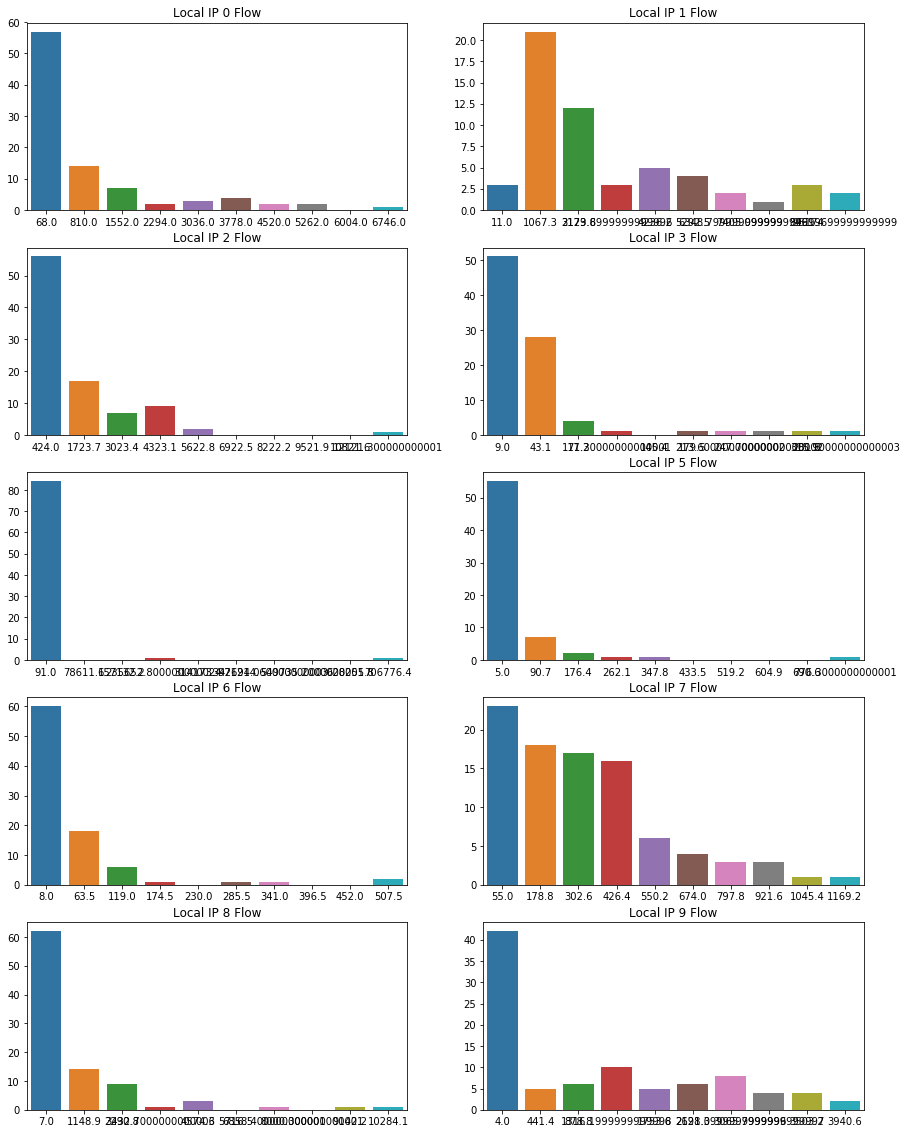

In [6]:
f, axarray = plt.subplots(5,2,figsize=(15,20))  # 5X2로 10개의 flow를 보일 것이다
count,division = np.histogram(ip0['f'],bins=10) # bins는 x축의 간격
g= sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[0,0]) #(0,0) 위치에 그래프를 넣을 것이다.
axarray[0,0].set_title("Local IP 0 Flow")

count, division = np.histogram(ip1['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[0,1])
axarray[0,1].set_title("Local IP 1 Flow")

count, division = np.histogram(ip2['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[1,0])
axarray[1,0].set_title("Local IP 2 Flow")

count, division = np.histogram(ip3['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[1,1])
axarray[1,1].set_title("Local IP 3 Flow")

count, division = np.histogram(ip4['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[2,0])
axarray[2,1].set_title("Local IP 4 Flow")

count, division = np.histogram(ip5['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[2,1])
axarray[2,1].set_title("Local IP 5 Flow")

count, division = np.histogram(ip6['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[3,0])
axarray[3,0].set_title("Local IP 6 Flow")

count, division = np.histogram(ip7['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[3,1])
axarray[3,1].set_title("Local IP 7 Flow")

count, division = np.histogram(ip8['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[4,0])
axarray[4,0].set_title("Local IP 8 Flow")

count, division = np.histogram(ip9['f'],bins=10)
sns.barplot(x=division[0:len(division)-1],y=count,ax=axarray[4,1])
axarray[4,1].set_title("Local IP 9 Flow")

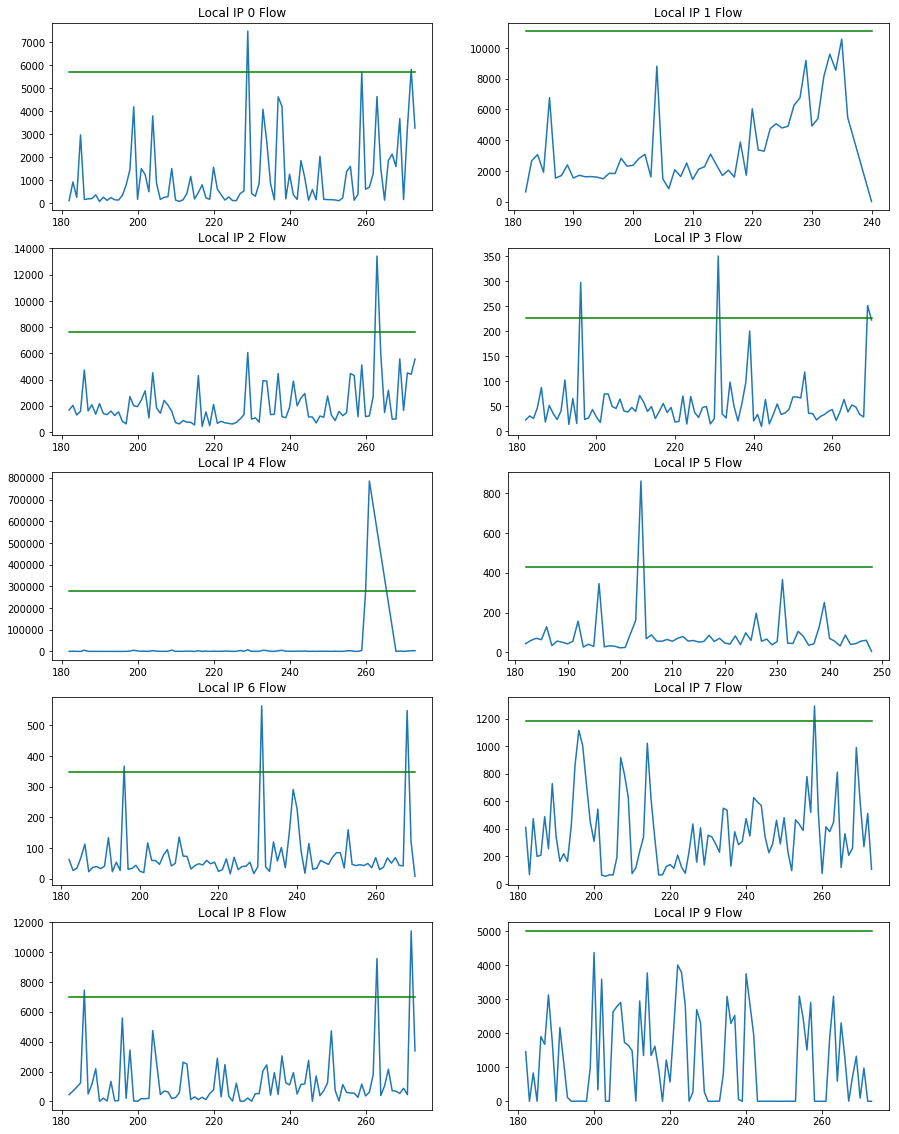

In [7]:
f,axarray = plt.subplots(5,2,figsize=(15,20))
axarray[0,0].plot(ip0['yday'],ip0['f'])
axarray[0,0].plot(ip0['yday'], [ip0['f'].mean() + 3*ip0['f'].std()]*len(ip0['yday']),color='g')
axarray[0,0].set_title("Local IP 0 Flow")

axarray[0,1].plot(ip1['yday'], ip1['f'])
axarray[0,1].plot(ip1['yday'], [ip1['f'].mean() + 3*ip1['f'].std()]*len(ip1['yday']),color='g')
axarray[0,1].set_title("Local IP 1 Flow")

axarray[1,0].plot(ip2['yday'], ip2['f'])
axarray[1,0].set_title("Local IP 2 Flow")
axarray[1,0].plot(ip2['yday'], [ip2['f'].mean() + 3*ip2['f'].std(ddof=0)]*len(ip2['yday']),color='g')


axarray[1,1].plot(ip3['yday'], ip3['f'])
axarray[1,1].set_title("Local IP 3 Flow")
axarray[1,1].plot(ip3['yday'], [ip3['f'].mean() + 3*ip3['f'].std(ddof=0)]*len(ip3['yday']),color='g')


axarray[2,0].plot(ip4['yday'], ip4['f'])
axarray[2,0].set_title("Local IP 4 Flow")
axarray[2,0].plot(ip4['yday'], [ip4['f'].mean() + 3*ip4['f'].std(ddof=0)]*len(ip4['yday']),color='g')

axarray[2,1].plot(ip5['yday'], ip5['f'])
axarray[2,1].set_title("Local IP 5 Flow")
axarray[2,1].plot(ip5['yday'], [ip5['f'].mean() + 3*ip5['f'].std(ddof=0)]*len(ip5['yday']),color='g')

axarray[3,0].plot(ip6['yday'], ip6['f'])
axarray[3,0].set_title("Local IP 6 Flow")
axarray[3,0].plot(ip6['yday'], [ip6['f'].mean() + 3*ip6['f'].std(ddof=0)]*len(ip6['yday']),color='g')

axarray[3,1].plot(ip7['yday'], ip7['f'])
axarray[3,1].set_title("Local IP 7 Flow")
axarray[3,1].plot(ip7['yday'], [ip7['f'].mean() + 3*ip7['f'].std(ddof=0)]*len(ip7['yday']),color='g')

axarray[4,0].plot(ip8['yday'], ip8['f'])
axarray[4,0].set_title("Local IP 8 Flow")
axarray[4,0].plot(ip8['yday'], [ip8['f'].mean() + 3*ip8['f'].std(ddof=0)]*len(ip8['yday']),color='g')


axarray[4,1].plot(ip9['yday'], ip9['f'])
axarray[4,1].set_title("Local IP 9 Flow")
axarray[4,1].plot(ip9['yday'], [ip9['f'].mean() + 3*ip9['f'].std(ddof=0)]*len(ip9['yday']),color='g')

In [8]:
count,division = np.histogram(ip0['f'],bins=10) 
count

array([57, 14,  7,  2,  3,  4,  2,  2,  0,  1], dtype=int64)

In [9]:
division

array([  68.,  810., 1552., 2294., 3036., 3778., 4520., 5262., 6004.,
       6746., 7488.])

In [10]:
ip0.head()

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6
20,2006-07-03,0,436624,249,184,0
30,2006-07-04,0,499290,2971,185,1
40,2006-07-05,0,423638,158,186,2


In [11]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [12]:
#normalizing하기
fv=[float(v)/float(max0) for v in ip0['f'].values] #모든 f값들을 최대 f값으로 나눔
ip0.loc[:,'f']=np.array(fv).reshape(-1,1)
fv =[float(v)/float(max1) for v in ip1['f'].values]
ip1.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max2) for v in ip2['f'].values]
ip2.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max3) for v in ip3['f'].values]
ip3.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max4) for v in ip4['f'].values]
ip4.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max5) for v in ip5['f'].values]
ip5.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max6) for v in ip6['f'].values]
ip6.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max7) for v in ip7['f'].values]
ip7.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max8) for v in ip8['f'].values]
ip8.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max9) for v in ip9['f'].values]
ip9.loc[:,'f'] =np.array(fv).reshape(-1,1)  

C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
# features 리스트와 모델의 target 만듦
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a) #객체 a를 dataX 뒤에 추가
        '''
        x = [1, 2, 3]
        x.append([4, 5])
        print (x)
        출력: [1, 2, 3, [4, 5]]
        '''
        dataY.append(dataset['f'].iloc[i+look_back])
    return np.array(dataX), np.array(dataY)

In [14]:
#단일 RNN을 훈련시킴
#KERAS를 사용한 RNN 구현
from keras.layers.wrappers import TimeDistributed
from keras.constraints import nonneg
look_back = 14

def trainModel(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    model = Sequential() # Neural Network 초기화
    #GRU: LSTM이랑 비슷
    model.add(GRU(64,input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1)) #출력 뉴런의 수를 1로 설정
    #compile(): 모델 학습과정 설정 - 손실 함수 및 최적화 방법 정의
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=0) # 모델 학습 시키기
    return model

In [15]:
#훈련된 모델로 예측 수행
def predictFlow(_model,data):
    ypred=[0]*look_back
    #_max = np.max(data['f'])
    for k in range(len(data)-look_back):
        pattern = data[k:k+look_back].values
        x = np.reshape(pattern, (1, len(pattern), 2))
        ypred.append(_model.predict(x)[0][0])
    #ypred=[v*_max for v in ypred]
    return ypred

In [16]:

m0 = trainModel(ip0[['f','yday']].copy())
m1 = trainModel(ip1[['f','yday']].copy())
m2 = trainModel(ip2[['f','yday']].copy())
m3 = trainModel(ip3[['f','yday']].copy())
m4 = trainModel(ip4[['f','yday']].copy())
m5 = trainModel(ip5[['f','yday']].copy())
m6 = trainModel(ip6[['f','yday']].copy())
m7 = trainModel(ip7[['f','yday']].copy())
m8 = trainModel(ip8[['f','yday']].copy())
m9 = trainModel(ip9[['f','yday']].copy())

W0802 09:31:25.971912  1708 deprecation_wrapper.py:119] From C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 09:31:26.006940  1708 deprecation_wrapper.py:119] From C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 09:31:26.016607  1708 deprecation_wrapper.py:119] From C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 09:31:26.277621  1708 deprecation_wrapper.py:119] From C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 09:31:

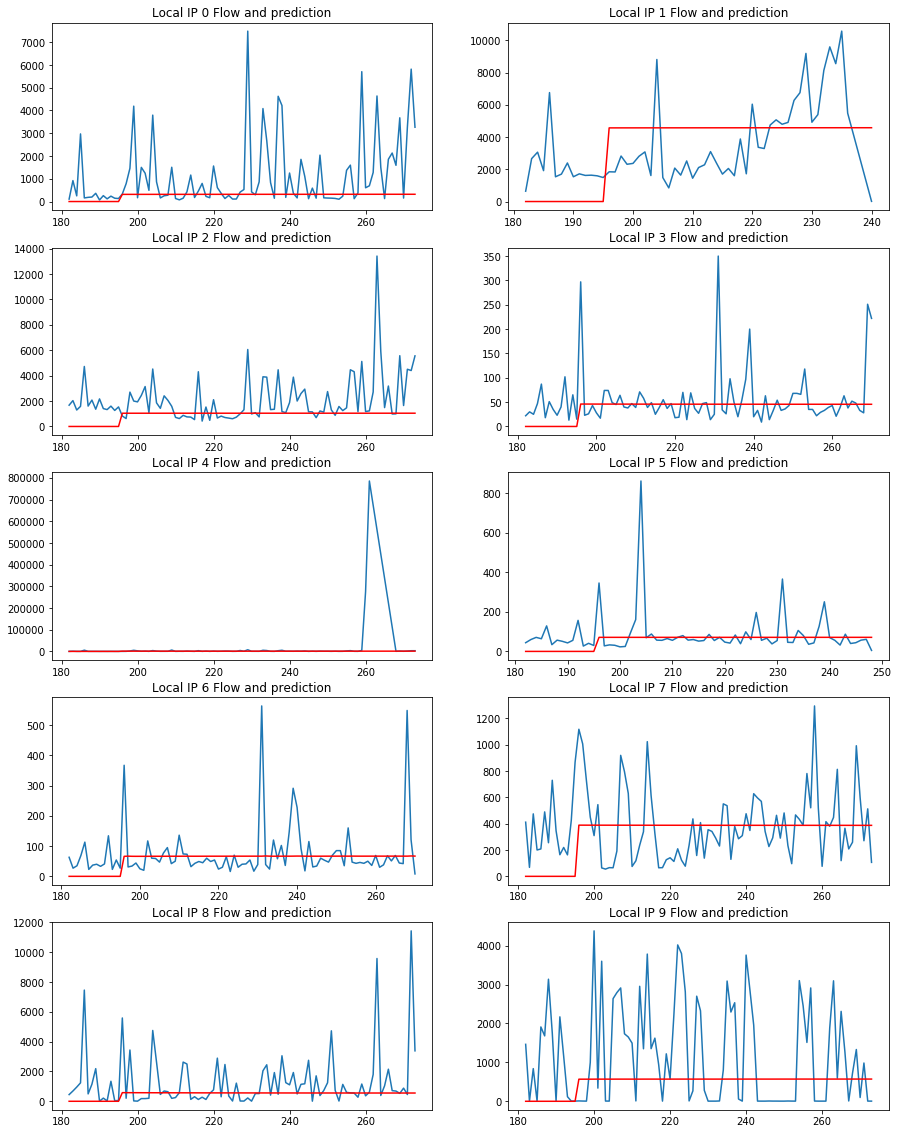

In [17]:
f, axarray = plt.subplots(5,2,figsize=(15,20))

ypred0 = np.multiply(predictFlow(m0, ip0[['f','yday']].copy()),max0)
ip0f = np.multiply(ip0['f'],max0)
ypred1 = np.multiply(predictFlow(m1,ip1[['f','yday']].copy()),max1)
ip1f = np.multiply(ip1['f'],max1)
ypred2 = np.multiply(predictFlow(m2,ip2[['f','yday']].copy()),max2)
ip2f = np.multiply(ip2['f'],max2)

ypred3 = np.multiply(predictFlow(m3,ip3[['f','yday']].copy()),max3)
ip3f = np.multiply(ip3['f'],max3)
ypred4 = np.multiply(predictFlow(m4,ip4[['f','yday']].copy()),max4)
ip4f = np.multiply(ip4['f'],max4)
ypred5 = np.multiply(predictFlow(m5,ip5[['f','yday']].copy()),max5)
ip5f = np.multiply(ip5['f'],max5)

ypred6 = np.multiply(predictFlow(m6,ip6[['f','yday']].copy()),max6)
ip6f = np.multiply(ip6['f'],max6)
ypred7 = np.multiply(predictFlow(m7,ip7[['f','yday']].copy()),max7)
ip7f = np.multiply(ip7['f'],max7)
ypred8 = np.multiply(predictFlow(m8,ip8[['f','yday']].copy()),max8)
ip8f = np.multiply(ip8['f'],max8)
ypred9 = np.multiply(predictFlow(m9,ip9[['f','yday']].copy()),max9)
ip9f = np.multiply(ip9['f'],max9)

axarray[0,0].plot(ip0['yday'],ip0f)
axarray[0,0].plot(ip0['yday'],ypred0,color='r')
axarray[0,0].set_title("Local IP 0 Flow and prediction")

axarray[0,1].plot(ip1['yday'], ip1f)
axarray[0,1].plot(ip1['yday'], ypred1,color='r',alpha=1)
axarray[0,1].set_title("Local IP 1 Flow and prediction")

axarray[1,0].plot(ip2['yday'], ip2f)
axarray[1,0].plot(ip2['yday'], ypred2,color='r',alpha=1)
axarray[1,0].set_title("Local IP 2 Flow and prediction")

axarray[1,1].plot(ip3['yday'], ip3f)
axarray[1,1].plot(ip3['yday'], ypred3,color='r',alpha=1)
axarray[1,1].set_title("Local IP 3 Flow and prediction")

axarray[2,0].plot(ip4['yday'], ip4f)
axarray[2,0].plot(ip4['yday'], ypred4,color='r',alpha=1)
axarray[2,0].set_title("Local IP 4 Flow and prediction")

axarray[2,1].plot(ip5['yday'], ip5f)
axarray[2,1].plot(ip5['yday'], ypred5,color='r',alpha=1)
axarray[2,1].set_title("Local IP 5 Flow and prediction")

axarray[3,0].plot(ip6['yday'], ip6f)
axarray[3,0].plot(ip6['yday'], ypred6,color='r',alpha=1)
axarray[3,0].set_title("Local IP 6 Flow and prediction")

axarray[3,1].plot(ip7['yday'], ip7f)
axarray[3,1].plot(ip7['yday'], ypred7,color='r',alpha=1)
axarray[3,1].set_title("Local IP 7 Flow and prediction")

axarray[4,0].plot(ip8['yday'], ip8f)
axarray[4,0].plot(ip8['yday'], ypred8,color='r',alpha=1)
axarray[4,0].set_title("Local IP 8 Flow and prediction")

axarray[4,1].plot(ip9['yday'], ip9f)
axarray[4,1].plot(ip9['yday'], ypred9,color='r',alpha=1)
axarray[4,1].set_title("Local IP 9 Flow and prediction")
plt.show()

In [18]:
# 실제와 예측이 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일하면 -1
corr0 = pd.Series(ip0f).corr(pd.Series(ypred0))
corr1 = pd.Series(ip1f).corr(pd.Series(ypred1))
corr2 = pd.Series(ip2f).corr(pd.Series(ypred2))
corr3 = pd.Series(ip3f).corr(pd.Series(ypred3))
corr4 = pd.Series(ip4f).corr(pd.Series(ypred4))
corr5 = pd.Series(ip5f).corr(pd.Series(ypred5))
corr6 = pd.Series(ip6f).corr(pd.Series(ypred6))
corr7 = pd.Series(ip7f).corr(pd.Series(ypred7))
corr8 = pd.Series(ip8f).corr(pd.Series(ypred8))
corr9 = pd.Series(ip9f).corr(pd.Series(ypred9))
corrdf = pd.DataFrame({'corr0':[corr0],
                       'corr1':[corr1],
                       'corr2':[corr2],
                       'corr3':[corr3],
                       'corr4':[corr4],
                       'corr5':[corr5],
                       'corr6':[corr6],
                       'corr7':[corr7],
                       'corr8':[corr8],
                       'corr9':[corr9]})
corrdf

,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
0,0.016313,0.40333,0.109704,0.302178,0.092297,0.310792,-0.183855,-0.11099,0.190862,-0.090575


In [19]:
#대략적인 엔트로피
ip0 = df[df['l_ipn']==0]
ip1 = df[df['l_ipn']==1][0:len(df[df['l_ipn']==1])-5]
ip2 = df[df['l_ipn']==2]
ip3 = df[df['l_ipn']==3]
ip4 = df[df['l_ipn']==4][0:len(df[df['l_ipn']==4])-7]
ip5 = df[df['l_ipn']==5]
ip6 = df[df['l_ipn']==6]
ip7 = df[df['l_ipn']==7]
ip8 = df[df['l_ipn']==8]
ip9 = df[df['l_ipn']==9]

In [20]:
def ApEn(U, m, r):

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))

In [21]:
m=2
r = 3
e0 = ApEn(np.multiply(ip0['f'].values,1),m,r)
e1 = ApEn(np.multiply(ip1['f'].values,1),m,r)
e2 = ApEn(np.multiply(ip2['f'].values,1),m,r)
e3 = ApEn(np.multiply(ip3['f'].values,1),m,r)
e4 = ApEn(np.multiply(ip4['f'].values,1),m,r)
e5 = ApEn(np.multiply(ip5['f'].values,1),m,r)
e6 = ApEn(np.multiply(ip6['f'].values,1),m,r)
e7 = ApEn(np.multiply(ip7['f'].values,1),m,r)
e8 = ApEn(np.multiply(ip8['f'].values,1),m,r)
e9 = ApEn(np.multiply(ip9['f'].values,1),m,r)

In [22]:
ent_values = pd.DataFrame({'e0':[e0], 'e1':[e1],'e2':[e2],'e3':[e3],'e4':[e4],'e5':[e5],
              'e6':[e6],'e7':[e7],'e8':[e8],'e9':[e9]})
ent_values.head()

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9
0,0.01105,0.020203,0.01105,0.360497,0.012903,0.169414,0.286478,0.004184,0.01105,0.264248


In [23]:
ip0.head()

,date,l_ipn,r_asn,f,yday,wday
0,2006-07-01,0,436704,106,182,5
10,2006-07-02,0,460025,920,183,6
20,2006-07-03,0,436624,249,184,0
30,2006-07-04,0,499290,2971,185,1
40,2006-07-05,0,423638,158,186,2


In [24]:
ip0['f'].head()

0      106
10     920
20     249
30    2971
40     158
Name: f, dtype: int64

In [25]:
ip0[['f','wday']]

,f,wday
0,106,5
10,920,6
20,249,0
30,2971,1
40,158,2
50,184,3
60,197,4
70,361,5
80,68,6
90,258,0


In [26]:
len(ip0['yday'])

92

In [ ]:
ip0['yday']